In [63]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [16]:
datadir = '/data/data_pub/eddy_trajectory_2.0exp_19930101_20180118.nc'

ds = xr.open_dataset(datadir, decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (obs: 25871877)
Dimensions without coordinates: obs
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) int8 ...
    latitude            (obs) float32 ...
    longitude           (obs) float32 ...
    observation_number  (obs) uint16 ...
    observed_flag       (obs) int8 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) uint16 ...
    time                (obs) int32 ...
    track               (obs) uint32 ...
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains eddy atlas from two-sate...
    comment:                   Surface product; mesoscale eddies
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    date_created:              2018-09-19T15:34:04Z
    time_coverage_duration:    P9148D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2018-01-18T00:00:00Z
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    product_version:           2.0.exp

Text(0.5, 1.0, '(734,)')

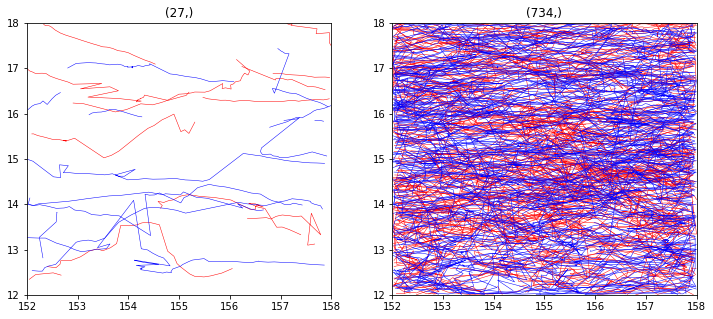

In [108]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(121)
time1 = datetime.datetime(2014, 1, 1, 0, 0).timestamp()
time2 = datetime.datetime(2015, 1, 1, 0, 0).timestamp()

time0 = datetime.datetime(1950, 1, 1, 0, 0).timestamp()

dt1 = (time1 - time0) / 86400
dt2 = (time2 - time0) / 86400

ind = np.where((ds.longitude>152) & (ds.longitude<158) & (ds.latitude>12) 
               & (ds.latitude<18) & (ds.time>dt1) & (ds.time<dt2))

lon1 = ds.longitude[ind].values
lat1 = ds.latitude[ind].values
cyc1 = ds.cyclonic_type[ind].values
time1 = ds.time[ind].values
track1 = ds.track[ind].values

id = np.unique(track1)

for num in id:
    #print(num)
    idtmp = np.where(track1==num)
    lontmp = lon1[idtmp]
    lattmp = lat1[idtmp]
    cyctmp = cyc1[idtmp]
    
    if cyctmp[0] > 0:
        
        plt.plot(lontmp, lattmp, color='r', linewidth=0.5)
        
    if cyctmp[0] < 0:
        
        plt.plot(lontmp, lattmp, color='b', linewidth=0.5)   

plt.xlim(152, 158)
plt.ylim(12, 18)
plt.title(str(id.shape))

plt.subplot(122)

ind = np.where((ds.longitude>152) & (ds.longitude<158) & (ds.latitude>12) & (ds.latitude<18))

lon1 = ds.longitude[ind].values
lat1 = ds.latitude[ind].values
cyc1 = ds.cyclonic_type[ind].values
time1 = ds.time[ind].values
track1 = ds.track[ind].values

id = np.unique(track1)

for num in id:
    #print(num)
    idtmp = np.where(track1==num)
    lontmp = lon1[idtmp]
    lattmp = lat1[idtmp]
    cyctmp = cyc1[idtmp]
    
    if cyctmp[0] > 0:
        
        plt.plot(lontmp, lattmp, color='r', linewidth=0.5)
        
    if cyctmp[0] < 0:
        
        plt.plot(lontmp, lattmp, color='b', linewidth=0.5)   

plt.xlim(152, 158)
plt.ylim(12, 18)
plt.title(str(id.shape))